<a href="https://colab.research.google.com/github/kipsangchepesa/Core12_moduleII-IP/blob/main/Moringa_Data_Science_core12_ModuleII_W1_Independent_Project_2021_11_Kipsang_Nicholas_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Defining the question.**
#a). Specific question
Being a football analyst in Mchezopesa Ltd and tasked to predict result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (by including rank in training dataset).



#b). Metrics of success

 How many goals the home team scores?

 How many goals the away team scores?


**c).Understanding the context**

FIFA introduced football ranking in 1993 to display teams ranking as per the games played, wins, loses, drawa and previous points. The rank is done by accumulative points. Every time a team plays, its ranking changes. Ranking is done periodilcally.

In many cases, a team that plays another team that has higher rank is likely to win the match

**d) Recording the Experimental Design**

This project will be understake by doing a logistic regresions. I will train a model using tournament type, home team, away teamand Fifa ranking on the results which is win, draw or lose. Fifa ranking changes per year hence when feeding the model for prediting will have the year which will determin the team's ranking that year

**e) Data Relevance**

We have two data sets to work with

1. The Fifa ranking dataset which shows ranking for each team periodically. We will comeupe with a new dataset from this that displays the ranking per team per year

2.,. Fifa resuls: This shows each game results whenever the teams play. It has the date, teams, tournament type, and score. With this we will append results(W,D,L) and official Fifa ranking that year depending on the year they have played

##1. Importing the libraries

In [1]:
#importing the libraries
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

##2. Loading the dataset

In [2]:
#loading the dataset 
fifa_ranking = pd.read_csv('/content/fifa_ranking.csv')
fifa_results=pd.read_csv('/content/results.csv')

In [3]:
# Determining the no. of records in our dataset
fifa_ranking.shape

(41361, 16)

In [4]:
fifa_results.shape

(40839, 9)

In [5]:
# Previewing the top of our dataset
fifa_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['tournament']
le = LabelEncoder()

# Converting the variables to numerical
#
for i in range(1):
    new = le.fit_transform(fifa_results[categorical_features[i]])
    fifa_results[categorical_features[i]] = new
    
fifa_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,54,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,54,London,England,False
2,1874-03-07,Scotland,England,2,1,54,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,54,London,England,False
4,1876-03-04,Scotland,England,3,0,54,Glasgow,Scotland,False


In [7]:
# Previewing the bottom of our dataset
fifa_ranking.head()
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['tournament']
le = LabelEncoder()

# Converting the variables to numerical
#

new = le.fit_transform(fifa_ranking['confederation'])
fifa_ranking['confederation'] = new
    
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1993-08-08


In [8]:
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
3,4,Sweden,SWE,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1993-08-08
4,5,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1993-08-08


**checking and making sure each colum has appropriate data types**

In [9]:
# Checking whether Fifa ranking has an appropriate datatype
#
fifa_ranking.info()
#Date  need to be converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     41361 non-null  int64  
 1   country_full             41361 non-null  object 
 2   country_abrv             41360 non-null  object 
 3   total_points             41360 non-null  float64
 4   previous_points          41360 non-null  float64
 5   rank_change              41360 non-null  float64
 6   cur_year_avg             41360 non-null  float64
 7   cur_year_avg_weighted    41360 non-null  float64
 8   last_year_avg            41360 non-null  float64
 9   last_year_avg_weighted   41360 non-null  float64
 10  two_year_ago_avg         41360 non-null  float64
 11  two_year_ago_weighted    41360 non-null  float64
 12  three_year_ago_avg       41360 non-null  float64
 13  three_year_ago_weighted  41360 non-null  float64
 14  confederation         

In [10]:
# convert date colukns to date type
fifa_ranking['rank_date']=pd.to_datetime(fifa_ranking['rank_date'])

In [11]:
#Fifa results data types
#convert date to date type
fifa_results['date']=pd.to_datetime(fifa_results['date'])
fifa_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  int64         
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(4)
memory usage: 2.5+ MB


**4. External Data Source Validation**

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

**a.Validation**

We took some records of fifa ranking and checked against official fifa ranking. Its correct. We also checked games played over time and realized the data given is correct representation of FIFA football match played

**5. Tidying the Dataset**

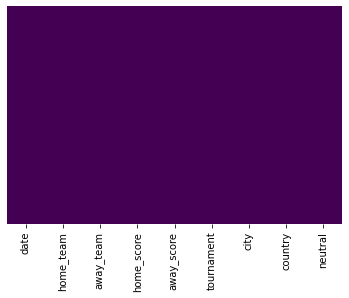

In [14]:
# Identifying the Missing Data
sns.heatmap(fifa_results.isnull(), yticklabels=False,cbar=False, cmap='viridis')

rank                       0
country_full               0
country_abrv               1
total_points               1
previous_points            1
rank_change                1
cur_year_avg               1
cur_year_avg_weighted      1
last_year_avg              1
last_year_avg_weighted     1
two_year_ago_avg           1
two_year_ago_weighted      1
three_year_ago_avg         1
three_year_ago_weighted    1
confederation              0
rank_date                  1
dtype: int64

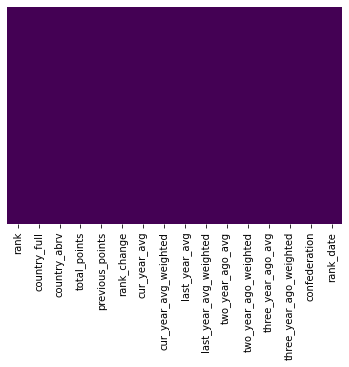

In [15]:
# missing data in the fifa ranking 

sns.heatmap(fifa_ranking.isnull(), yticklabels=False,cbar=False, cmap='viridis')
fifa_ranking.isnull().sum()

***Seems there are no missing values. However, when we merge the dataset or assign the values of ranking to fifa results table we are likely to get missing values***

**More data cleaning procedures**

In [16]:
#Add year to the two datasets using dt.year method 
fifa_results['Year']= fifa_results['date'].dt.year
fifa_ranking['Year']=fifa_ranking['rank_date'].dt.year

In [17]:
# Creating a dataset of fifa results to incorporat only years that are in fifa ranking
Years = list(fifa_ranking['Year'].unique())
#get those games from 1993 when fifa started ranking teams
fifa_results = fifa_results[fifa_results['Year'].isin(Years)]
fifa_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
17361,1993-01-01,Ghana,Mali,1,1,54,Libreville,Gabon,True,1993
17362,1993-01-02,Gabon,Burkina Faso,1,1,54,Libreville,Gabon,False,1993
17363,1993-01-02,Kuwait,Lebanon,2,0,54,Kuwait City,Kuwait,False,1993
17364,1993-01-03,Burkina Faso,Mali,1,0,54,Libreville,Gabon,True,1993
17365,1993-01-03,Gabon,Ghana,2,3,54,Libreville,Gabon,False,1993
...,...,...,...,...,...,...,...,...,...,...
33767,2011-12-21,Chile,Paraguay,3,2,54,La Serena,Chile,False,2011
33768,2011-12-22,Angola,Namibia,0,0,54,Lubango,Angola,False,2011
33769,2011-12-22,Venezuela,Costa Rica,0,2,54,Barquisimeto,Venezuela,False,2011
33770,2011-12-28,Basque Country,Tunisia,0,2,54,Bilbao,Spain,False,2011


In [18]:
# create a new dataframe for fifa ranking that will show teams and ranks per year
new_ranks=fifa_ranking.set_index('country_full')[['rank','Year']].drop_duplicates().reset_index()
#new_ranks.to_csv('data/Fifa_new_ranks.csv')

In [19]:
new_ranks

,country_full,rank,Year
0,Germany,1,1993.0
1,Italy,2,1993.0
2,Switzerland,3,1993.0
3,Sweden,4,1993.0
4,Argentina,5,1993.0
...,...,...,...
3741,Cook Islands,190,2011.0
3742,Bahamas,196,2011.0
3743,Aruba,198,2011.0
3744,American Samoa,204,2011.0


**append ranks and results to fifa results table**

In [20]:
# Function to append home and away rank
def update_rank(country, year):
    home_rank= new_ranks[(new_ranks['country_full']==country) & (new_ranks['Year']==year)]['rank'].values#.reshape([1])
    return home_rank

In [21]:
#Append home rank using the function by creating  a new column 
fifa_results['Home_rank'] = fifa_results.apply(lambda x: update_rank(x['home_team'], x['Year']), axis=1)

In [22]:
#Append home rank using the function by creating  a new column 
fifa_results['Away_rank'] = fifa_results.apply(lambda x: update_rank(x['away_team'], x['Year']), axis=1)

In [23]:
fifa_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Home_rank,Away_rank
17361,1993-01-01,Ghana,Mali,1,1,54,Libreville,Gabon,True,1993,[48],[74]
17362,1993-01-02,Gabon,Burkina Faso,1,1,54,Libreville,Gabon,False,1993,[64],[113]
17363,1993-01-02,Kuwait,Lebanon,2,0,54,Kuwait City,Kuwait,False,1993,[60],[108]
17364,1993-01-03,Burkina Faso,Mali,1,0,54,Libreville,Gabon,True,1993,[113],[74]
17365,1993-01-03,Gabon,Ghana,2,3,54,Libreville,Gabon,False,1993,[64],[48]
...,...,...,...,...,...,...,...,...,...,...,...,...
33767,2011-12-21,Chile,Paraguay,3,2,54,La Serena,Chile,False,2011,[15],[24]
33768,2011-12-22,Angola,Namibia,0,0,54,Lubango,Angola,False,2011,[88],[138]
33769,2011-12-22,Venezuela,Costa Rica,0,2,54,Barquisimeto,Venezuela,False,2011,[],[69]
33770,2011-12-28,Basque Country,Tunisia,0,2,54,Bilbao,Spain,False,2011,[],[44]


In [24]:
fifa_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Home_rank,Away_rank
17361,1993-01-01,Ghana,Mali,1,1,54,Libreville,Gabon,True,1993,[48],[74]
17362,1993-01-02,Gabon,Burkina Faso,1,1,54,Libreville,Gabon,False,1993,[64],[113]
17363,1993-01-02,Kuwait,Lebanon,2,0,54,Kuwait City,Kuwait,False,1993,[60],[108]
17364,1993-01-03,Burkina Faso,Mali,1,0,54,Libreville,Gabon,True,1993,[113],[74]
17365,1993-01-03,Gabon,Ghana,2,3,54,Libreville,Gabon,False,1993,[64],[48]
...,...,...,...,...,...,...,...,...,...,...,...,...
33767,2011-12-21,Chile,Paraguay,3,2,54,La Serena,Chile,False,2011,[15],[24]
33768,2011-12-22,Angola,Namibia,0,0,54,Lubango,Angola,False,2011,[88],[138]
33769,2011-12-22,Venezuela,Costa Rica,0,2,54,Barquisimeto,Venezuela,False,2011,[],[69]
33770,2011-12-28,Basque Country,Tunisia,0,2,54,Bilbao,Spain,False,2011,[],[44]


In [54]:
#Outputting the file 
fifa_results.to_csv('fifa_results.csv')

In [58]:
# Read the new cleaned dataset 
fifa_df = pd.read_csv('/content/fifa_results.csv')
fifa_df['Home_rank']=fifa_df['Home_rank'].str.strip("[]")
fifa_df['Away_rank']=fifa_df['Away_rank'].str.strip("[]")
fifa_df['Home_rank']=fifa_df['Home_rank'].str.split(' ').str[0]
fifa_df['Away_rank']=fifa_df['Away_rank'].str.split(' ').str[0]
fifa_df['Home_rank']=fifa_df['Home_rank'].apply(pd.to_numeric)
fifa_df['Away_rank']=fifa_df['Away_rank'].apply(pd.to_numeric)
fifa_df.dropna(inplace=True)

In [60]:
# Convert home rank and away rank to integer for use in the machine learning
fifa_df['Home_rank']=fifa_df['Home_rank'].astype(int)
fifa_df['Away_rank']=fifa_df['Away_rank'].astype(int)

In [62]:
# add results D,W,L as per the match results
#create status column for home perspective 
def status_col(home_score,away_score):
    if home_score>away_score:
        results = 'W'
    elif home_score<away_score:
        results = 'L'
    else:
        results = 'D'
    return results
fifa_df['Results'] = fifa_df.apply(lambda x: status_col(x['home_score'], x['away_score']), axis=1)

In [63]:
#convert tournaments to categorial 
def convert_categorical_cols(data,col):
    colum_values = list(data[col].unique())
    dicts = {}
    values = range(len(colum_values))
    for i in range(len(colum_values)):
        dicts[colum_values[i]] = values[i]
        values = range(len(colum_values))
    print(dicts)
    data[col]=data[col].map(dicts)
#The function takes the dataset and the column and create a dictionary that maps all unique 
# column values to numerical values for machine learning 
convert_categorical_cols(fifa_df,'tournament')

{54: 0, 8: 1, 52: 2, 77: 3, 71: 4, 66: 5, 98: 6, 38: 7, 67: 8, 20: 9, 19: 10, 100: 11, 27: 12, 68: 13, 14: 14, 56: 15, 10: 16, 101: 17, 70: 18, 7: 19, 51: 20, 82: 21, 96: 22, 58: 23, 89: 24, 18: 25, 26: 26, 48: 27, 87: 28, 90: 29, 81: 30, 107: 31, 2: 32, 69: 33, 95: 34, 5: 35, 1: 36, 65: 37, 45: 38, 47: 39, 25: 40, 91: 41, 92: 42, 57: 43, 99: 44, 79: 45, 105: 46, 73: 47, 85: 48, 88: 49, 49: 50, 3: 51, 93: 52, 4: 53, 9: 54, 102: 55, 46: 56, 78: 57, 76: 58, 83: 59, 0: 60}


In [64]:
fifa_df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Home_rank,Away_rank,Results
0,17361,1993-01-01,Ghana,Mali,1,1,0,Libreville,Gabon,True,1993,48,74,D
1,17362,1993-01-02,Gabon,Burkina Faso,1,1,0,Libreville,Gabon,False,1993,64,113,D
2,17363,1993-01-02,Kuwait,Lebanon,2,0,0,Kuwait City,Kuwait,False,1993,60,108,W
3,17364,1993-01-03,Burkina Faso,Mali,1,0,0,Libreville,Gabon,True,1993,113,74,W
4,17365,1993-01-03,Gabon,Ghana,2,3,0,Libreville,Gabon,False,1993,64,48,L


**Exploratory Data Analysis**

In [65]:
# Checking the correlations between numeric variables 
fifa_df.corr()

#It shows that home score is negatively correlated to home rank. 
# This is because when a rank is high, the team perfemace is not good
#same case for away rank and score.

,Unnamed: 0,home_score,away_score,tournament,neutral,Year,Home_rank,Away_rank
Unnamed: 0,1.000000,-0.024469,-0.002109,0.057857,0.004807,0.997262,0.103169,0.098292
home_score,-0.024469,1.000000,-0.168970,0.016204,-0.044913,-0.023848,-0.128223,0.330245
away_score,-0.002109,-0.168970,1.000000,0.054955,0.103842,-0.003249,0.226234,-0.157027
tournament,0.057857,0.016204,0.054955,1.000000,0.334517,0.060110,0.114309,0.122939
neutral,0.004807,-0.044913,0.103842,0.334517,1.000000,0.008425,0.016880,0.026547
Year,0.997262,-0.023848,-0.003249,0.060110,0.008425,1.000000,0.105405,0.100438
Home_rank,0.103169,-0.128223,0.226234,0.114309,0.016880,0.105405,1.000000,0.444384
Away_rank,0.098292,0.330245,-0.157027,0.122939,0.026547,0.100438,0.444384,1.000000


Text(0, 0.5, 'COUNT')

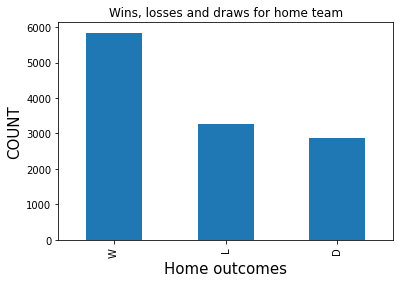

In [66]:
#Plot a graph on the for wins losses and draws for home team
#This shows that home teams win more than away team. Draws and losses seems to be balanced. 
fifa_df['Results'].value_counts().plot(kind='bar')
plt.title("Wins, losses and draws for home team")
plt.xlabel("Home outcomes",fontsize=15)
plt.ylabel("COUNT",fontsize=15)

**Implementing the Solution**

**1. Using logistics regression**

In [67]:
#Logistic regression model 
X = fifa_df[['tournament','Home_rank','Away_rank']]
y = fifa_df['Results']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [68]:
#making predictions 
predictions = logmodel.predict(X_test)

In [69]:
#checking  perfomance 
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))
print('###################################################################')
print(print('Accuracy' , accuracy_score(y_test, predictions)))
#The model has performed averagely 55% which is not soo good to help in predicting
#For draws, the models was unable to predict any. Its mostly able to predict win or loss

              precision    recall  f1-score   support

           D       0.00      0.00      0.00       573
           L       0.53      0.55      0.54       710
           W       0.57      0.85      0.68      1115

    accuracy                           0.56      2398
   macro avg       0.37      0.47      0.41      2398
weighted avg       0.42      0.56      0.48      2398

[[  0 179 394]
 [  0 389 321]
 [  0 164 951]]
###################################################################
Accuracy 0.5587989991659716
None


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. **Using Polynomial regression**

In [70]:
# Fit polynomial Regression to the dataset
 #With the degree of 1 its like linear
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
y

0        D
1        D
2        W
3        W
4        L
        ..
16402    D
16403    W
16404    D
16406    W
16407    D
Name: Results, Length: 11986, dtype: object

In [74]:
from sklearn.linear_model import LinearRegression
fifa_df['Results'] = fifa_df['Results'].astype('category')
y = fifa_df['Results'] 
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('fifa Prediction (Polynomial Regression)')
plt.xlabel('Ranks')
plt.ylabel('results')
plt.show()

# Since the results is categorical, polynomial regression cannot work in this model.

ValueError: ignored

**Challenging the solution**

Our model might not be able to give correct predition given the surprising perfomance of football teams. Some teams that are highly ranked are beaten hence a winners turns to be a loss

**Follow up questions**

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

a). **Did we have the right data?**

Yes. Data given was well and enough to create a model

b). **Do we need other data to answer our question?**

No

c).**Did we have the right question?**

The question is well framed. Many companies need such questiona nd models to help gamblers predict the outcomes of games. Betting companies also need such models to know the odds to place on their games to avoid losses in betting